In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('Final_cars_data.csv')

In [2]:
df.dtypes

Year            int64
Model          object
Type           object
price           int64
mileage         int64
colour         object
city_mpg        int64
highway_mpg     int64
Pin code        int64
Area           object
contact         int64
id              int64
dtype: object

In [3]:
df.head()

,Year,Model,Type,price,mileage,colour,city_mpg,highway_mpg,Pin code,Area,contact,id
0,2013,Mustang,Ecoboost,10595,52412,Red,19,19,90250,"Hawthorne ,CA",4245677378,831406509
1,2014,Mustang,Ecoboost,17950,91875,Black,19,19,36608,"Mobile ,AL",2512572800,844891639
2,2005,Mustang,Premium,9690,92385,Sonic Blue Metallic,19,19,20152,"Chantilly ,VA",8553512738,841743756
3,2009,Mustang,GT,13969,97789,Dark Candy Apple Red,15,15,45177,"Wilmington ,OH",9375563097,844440740
4,2014,Mustang,GT,32990,18781,Silver,15,15,48105,"Ann Arbor ,MI",9018810260,848436197


In [4]:
df.Model.value_counts()

Mustang    7743
SHELBY      648
Name: Model, dtype: int64

<AxesSubplot:>

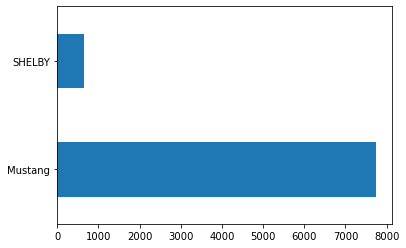

In [5]:
df.Model.value_counts().plot(kind = 'barh')

In [6]:
df.Type.value_counts()

GT          3939
Ecoboost    1866
Mach-E      1037
Premium      765
GT500        417
GT350        221
Bullitt       78
Boss          54
Standard      10
PREMIUM        3
BULLITT        1
Name: Type, dtype: int64

<AxesSubplot:>

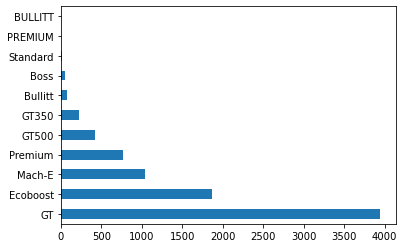

In [7]:
df.Type.value_counts().plot(kind = 'barh')

dropping these contact and id features but will be usin them in the final deployemnet. 

In [8]:
df = df.drop(['contact', 'id', 'Pin code', 'Area'], axis = 1)
df.head()

,Year,Model,Type,price,mileage,colour,city_mpg,highway_mpg
0,2013,Mustang,Ecoboost,10595,52412,Red,19,19
1,2014,Mustang,Ecoboost,17950,91875,Black,19,19
2,2005,Mustang,Premium,9690,92385,Sonic Blue Metallic,19,19
3,2009,Mustang,GT,13969,97789,Dark Candy Apple Red,15,15
4,2014,Mustang,GT,32990,18781,Silver,15,15


In [9]:
df['colour'] = df['colour'].str.lower()
df['Type'] = df['Type'].str.lower()
df.head()

,Year,Model,Type,price,mileage,colour,city_mpg,highway_mpg
0,2013,Mustang,ecoboost,10595,52412,red,19,19
1,2014,Mustang,ecoboost,17950,91875,black,19,19
2,2005,Mustang,premium,9690,92385,sonic blue metallic,19,19
3,2009,Mustang,gt,13969,97789,dark candy apple red,15,15
4,2014,Mustang,gt,32990,18781,silver,15,15


In [10]:
df['Model'].value_counts()

Mustang    7743
SHELBY      648
Name: Model, dtype: int64

In [11]:
df['Type'].value_counts()

gt          3939
ecoboost    1866
mach-e      1037
premium      768
gt500        417
gt350        221
bullitt       79
boss          54
standard      10
Name: Type, dtype: int64

In [12]:
df['colour'].value_counts().head(20)

shadow black                           1061
black                                   917
oxford white                            570
red                                     477
white                                   435
blue                                    375
gray                                    369
race red                                338
magnetic metallic                       307
magnetic                                258
silver                                  251
ingot silver metallic                   163
iconic silver metallic                  147
ruby red metallic tinted clearcoat      146
orange                                  134
rapid red metallic tinted clearcoat     132
star white                              130
carbonized gray metallic                125
kona blue metallic                      123
grabber blue                             97
Name: colour, dtype: int64

In [13]:
df['colour'] = df['colour'].str.rstrip()
df['colour'] = df['colour'].str.lstrip()
df.head()

,Year,Model,Type,price,mileage,colour,city_mpg,highway_mpg
0,2013,Mustang,ecoboost,10595,52412,red,19,19
1,2014,Mustang,ecoboost,17950,91875,black,19,19
2,2005,Mustang,premium,9690,92385,sonic blue metallic,19,19
3,2009,Mustang,gt,13969,97789,dark candy apple red,15,15
4,2014,Mustang,gt,32990,18781,silver,15,15


In [14]:
df["car_colour"] = df["colour"].map(lambda x: 'red' if 'red' in x else 
                                         'black' if 'black' in x else 
                                         'blue' if 'blue' in x else
                                         'white' if 'white' in x else 
                                         'silver' if 'silver' in x else
                                         'magnetic' if 'magnetic' in x else
                                         'gray' if 'gray' in x else
                                         'orange' if 'orange' in x else
                                         'green' if 'green' in x else
                                         'yellow' if 'yellow' in x else
                                         'marron' if 'maroon' in x else
                                         'other')
df.head(10)

,Year,Model,Type,price,mileage,colour,city_mpg,highway_mpg,car_colour
0,2013,Mustang,ecoboost,10595,52412,red,19,19,red
1,2014,Mustang,ecoboost,17950,91875,black,19,19,black
2,2005,Mustang,premium,9690,92385,sonic blue metallic,19,19,blue
3,2009,Mustang,gt,13969,97789,dark candy apple red,15,15,red
4,2014,Mustang,gt,32990,18781,silver,15,15,silver
5,2011,Mustang,gt,24500,44916,black,17,17,black
6,2013,Mustang,ecoboost,13988,102821,ingot silver metallic,19,19,silver
7,2013,Mustang,ecoboost,16850,83153,red,19,19,red
8,2013,Mustang,gt,25990,75662,gray,15,15,gray
9,2010,Mustang,ecoboost,9998,121219,kona blue metallic,18,18,blue


In [15]:
df['car_colour'].value_counts().head(20)

black       2020
white       1353
red         1344
blue        1149
silver       704
gray         627
magnetic     567
orange       210
other        168
green        166
yellow        70
marron        13
Name: car_colour, dtype: int64

In [16]:
df['Type'].value_counts().head(20)

gt          3939
ecoboost    1866
mach-e      1037
premium      768
gt500        417
gt350        221
bullitt       79
boss          54
standard      10
Name: Type, dtype: int64

In [17]:
df = df.drop(['colour'], axis = 1)
df.head()

,Year,Model,Type,price,mileage,city_mpg,highway_mpg,car_colour
0,2013,Mustang,ecoboost,10595,52412,19,19,red
1,2014,Mustang,ecoboost,17950,91875,19,19,black
2,2005,Mustang,premium,9690,92385,19,19,blue
3,2009,Mustang,gt,13969,97789,15,15,red
4,2014,Mustang,gt,32990,18781,15,15,silver


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'city_mpg'}>],
       [<AxesSubplot:title={'center':'highway_mpg'}>, <AxesSubplot:>]],
      dtype=object)

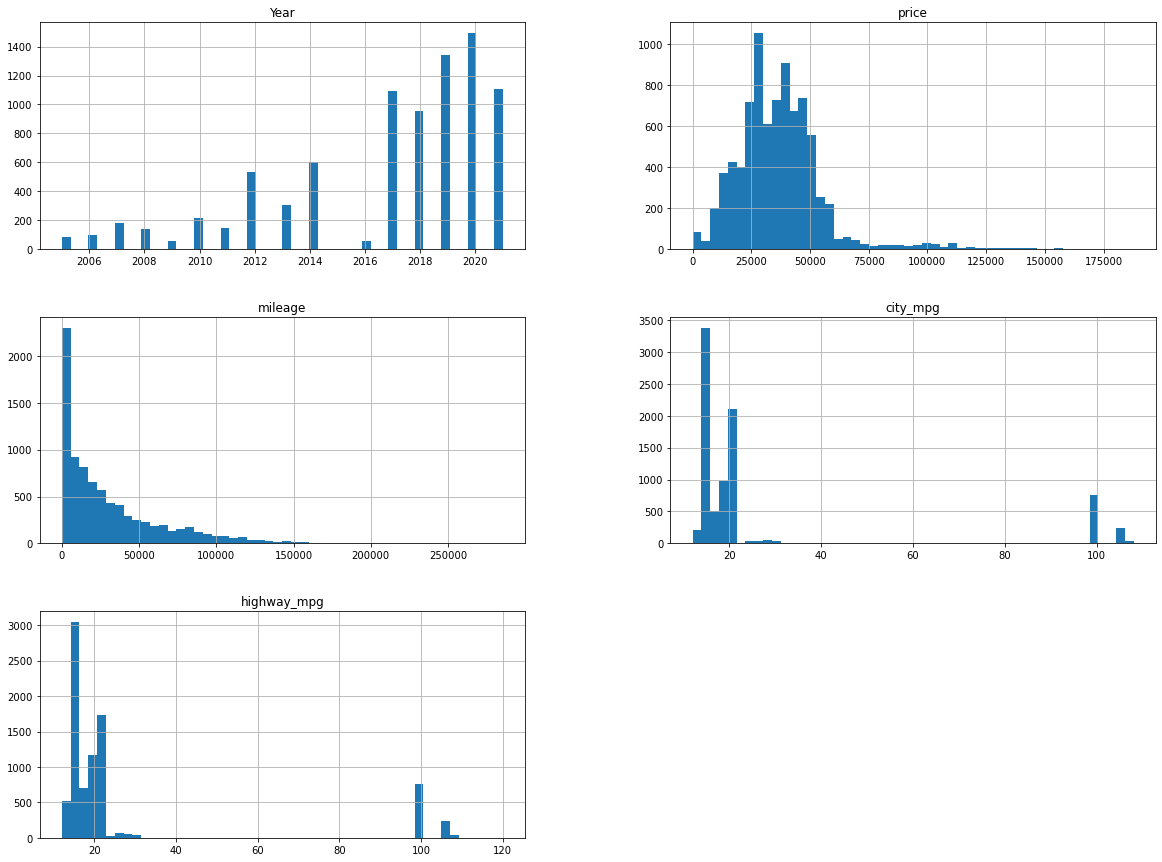

In [18]:
df.hist(bins=50, figsize=(20,15))

In [19]:
df.shape

(8391, 8)

<AxesSubplot:xlabel='price', ylabel='Count'>

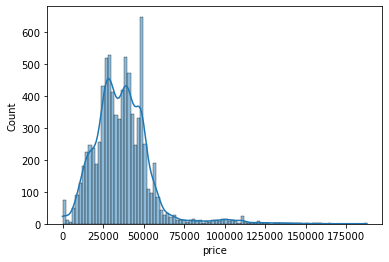

In [20]:
sns.histplot(data = df.price, kde = True)

remove outliers

<AxesSubplot:xlabel='price', ylabel='Count'>

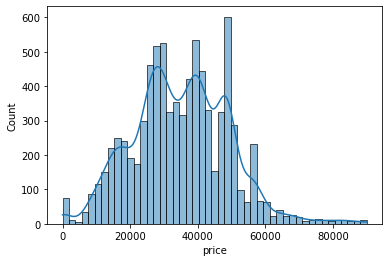

In [21]:
df['z_score'] = (df.price - df.price.mean()) /df.price.std()
df_z = df[(df.z_score < 3) & (df.z_score > -3)]
sns.histplot(data = df_z.price, kde = True)

In [22]:
df_z.shape

(8211, 9)

add some new columns

In [23]:
df2 = df_z.copy()
df2 = df2.drop(['z_score'], axis = 1)
df2['new_col1'] = df2['Year']/df2['city_mpg']
df2['new_col2'] = df2['mileage']/df2['city_mpg']
df2['new_col3'] = df2['mileage']/df2['Year']
df2.columns

Index(['Year', 'Model', 'Type', 'price', 'mileage', 'city_mpg', 'highway_mpg',
       'car_colour', 'new_col1', 'new_col2', 'new_col3'],
      dtype='object')

In [24]:
df2

,Year,Model,Type,price,mileage,city_mpg,highway_mpg,car_colour,new_col1,new_col2,new_col3
0,2013,Mustang,ecoboost,10595,52412,19,19,red,105.947368,2758.526316,26.036761
1,2014,Mustang,ecoboost,17950,91875,19,19,black,106.000000,4835.526316,45.618173
2,2005,Mustang,premium,9690,92385,19,19,blue,105.526316,4862.368421,46.077307
3,2009,Mustang,gt,13969,97789,15,15,red,133.933333,6519.266667,48.675460
4,2014,Mustang,gt,32990,18781,15,15,silver,134.266667,1252.066667,9.325223
...,...,...,...,...,...,...,...,...,...,...,...
8386,2019,Mustang,gt,10142,18145,15,15,black,134.600000,1209.666667,8.987122
8387,2019,Mustang,gt,7692,18145,15,15,blue,134.600000,1209.666667,8.987122
8388,2020,Mustang,gt,684,6970,15,15,blue,134.666667,464.666667,3.450495
8389,2020,Mustang,gt,13102,6970,20,20,red,101.000000,348.500000,3.450495


In [25]:
import math
df2['mileage']= np.log(df2['mileage'])
df2['city_mpg']= np.log(df2['city_mpg'])
df2['highway_mpg']= np.log(df2['highway_mpg'])
df2['new_col1']= np.log(df2['new_col1'])
df2['new_col2']= np.log(df2['new_col2'])
df2['new_col3'] = np.log(df2['new_col3'])
df2

,Year,Model,Type,price,mileage,city_mpg,highway_mpg,car_colour,new_col1,new_col2,new_col3
0,2013,Mustang,ecoboost,10595,10.866891,2.944439,2.944439,red,4.662942,7.922452,3.259509
1,2014,Mustang,ecoboost,17950,11.428184,2.944439,2.944439,black,4.663439,8.483745,3.820306
2,2005,Mustang,premium,9690,11.433720,2.944439,2.944439,blue,4.658960,8.489281,3.830321
3,2009,Mustang,gt,13969,11.490567,2.708050,2.708050,red,4.897342,8.782517,3.885175
4,2014,Mustang,gt,32990,9.840601,2.708050,2.708050,silver,4.899828,7.132551,2.232723
...,...,...,...,...,...,...,...,...,...,...,...
8386,2019,Mustang,gt,10142,9.806150,2.708050,2.708050,black,4.902307,7.098100,2.195793
8387,2019,Mustang,gt,7692,9.806150,2.708050,2.708050,blue,4.902307,7.098100,2.195793
8388,2020,Mustang,gt,684,8.849371,2.708050,2.708050,blue,4.902803,6.141320,1.238518
8389,2020,Mustang,gt,13102,8.849371,2.995732,2.995732,red,4.615121,5.853638,1.238518


In [26]:
df2.head()

,Year,Model,Type,price,mileage,city_mpg,highway_mpg,car_colour,new_col1,new_col2,new_col3
0,2013,Mustang,ecoboost,10595,10.866891,2.944439,2.944439,red,4.662942,7.922452,3.259509
1,2014,Mustang,ecoboost,17950,11.428184,2.944439,2.944439,black,4.663439,8.483745,3.820306
2,2005,Mustang,premium,9690,11.433720,2.944439,2.944439,blue,4.658960,8.489281,3.830321
3,2009,Mustang,gt,13969,11.490567,2.708050,2.708050,red,4.897342,8.782517,3.885175
4,2014,Mustang,gt,32990,9.840601,2.708050,2.708050,silver,4.899828,7.132551,2.232723


train test split

In [27]:
from sklearn.preprocessing import OrdinalEncoder
df2['Model'] = OrdinalEncoder().fit_transform(df2[['Model']])
df2

,Year,Model,Type,price,mileage,city_mpg,highway_mpg,car_colour,new_col1,new_col2,new_col3
0,2013,0.0,ecoboost,10595,10.866891,2.944439,2.944439,red,4.662942,7.922452,3.259509
1,2014,0.0,ecoboost,17950,11.428184,2.944439,2.944439,black,4.663439,8.483745,3.820306
2,2005,0.0,premium,9690,11.433720,2.944439,2.944439,blue,4.658960,8.489281,3.830321
3,2009,0.0,gt,13969,11.490567,2.708050,2.708050,red,4.897342,8.782517,3.885175
4,2014,0.0,gt,32990,9.840601,2.708050,2.708050,silver,4.899828,7.132551,2.232723
...,...,...,...,...,...,...,...,...,...,...,...
8386,2019,0.0,gt,10142,9.806150,2.708050,2.708050,black,4.902307,7.098100,2.195793
8387,2019,0.0,gt,7692,9.806150,2.708050,2.708050,blue,4.902307,7.098100,2.195793
8388,2020,0.0,gt,684,8.849371,2.708050,2.708050,blue,4.902803,6.141320,1.238518
8389,2020,0.0,gt,13102,8.849371,2.995732,2.995732,red,4.615121,5.853638,1.238518


In [28]:
#col = df[['Model', 'Type', 'car_colour']]
df2 = pd.get_dummies(df2, columns = ['Type', 'car_colour'], drop_first=True)
df2

,Year,Model,price,mileage,city_mpg,highway_mpg,new_col1,new_col2,new_col3,Type_bullitt,...,car_colour_gray,car_colour_green,car_colour_magnetic,car_colour_marron,car_colour_orange,car_colour_other,car_colour_red,car_colour_silver,car_colour_white,car_colour_yellow
0,2013,0.0,10595,10.866891,2.944439,2.944439,4.662942,7.922452,3.259509,0,...,0,0,0,0,0,0,1,0,0,0
1,2014,0.0,17950,11.428184,2.944439,2.944439,4.663439,8.483745,3.820306,0,...,0,0,0,0,0,0,0,0,0,0
2,2005,0.0,9690,11.433720,2.944439,2.944439,4.658960,8.489281,3.830321,0,...,0,0,0,0,0,0,0,0,0,0
3,2009,0.0,13969,11.490567,2.708050,2.708050,4.897342,8.782517,3.885175,0,...,0,0,0,0,0,0,1,0,0,0
4,2014,0.0,32990,9.840601,2.708050,2.708050,4.899828,7.132551,2.232723,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8386,2019,0.0,10142,9.806150,2.708050,2.708050,4.902307,7.098100,2.195793,0,...,0,0,0,0,0,0,0,0,0,0
8387,2019,0.0,7692,9.806150,2.708050,2.708050,4.902307,7.098100,2.195793,0,...,0,0,0,0,0,0,0,0,0,0
8388,2020,0.0,684,8.849371,2.708050,2.708050,4.902803,6.141320,1.238518,0,...,0,0,0,0,0,0,0,0,0,0
8389,2020,0.0,13102,8.849371,2.995732,2.995732,4.615121,5.853638,1.238518,0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
y = df2['price']
X = df2.drop(['price'], axis = 1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### create a baseline model

6685.200185013071


<AxesSubplot:xlabel='price', ylabel='Density'>

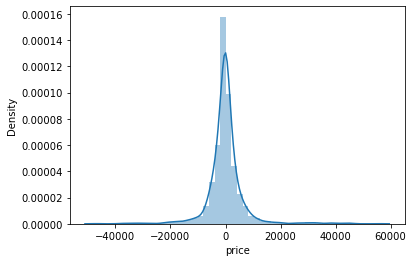

In [30]:
from sklearn.ensemble import RandomForestRegressor
tree_reg = RandomForestRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

final_predictions = tree_reg.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)

print(final_mse**0.5)
sns.distplot(y_test - final_predictions)

In [31]:
importance = tree_reg.feature_importances_

    
ft = list(zip(df2.columns, importance.tolist()))

sorted(zip(importance, df2.columns), reverse=True)[:10]

[(0.26521215680943333, 'new_col2'),
 (0.255089814593441, 'price'),
 (0.1392453816536021, 'highway_mpg'),
 (0.07667989404517742, 'new_col1'),
 (0.06846650925829349, 'Type_bullitt'),
 (0.04683266085017566, 'Type_ecoboost'),
 (0.028357497945288444, 'Year'),
 (0.026531880390327844, 'Type_gt'),
 (0.01715143994291668, 'Model'),
 (0.014725407155023365, 'city_mpg')]

In [32]:
df2.shape

(8211, 28)

In [33]:
X_train.head()

,Year,Model,mileage,city_mpg,highway_mpg,new_col1,new_col2,new_col3,Type_bullitt,Type_ecoboost,...,car_colour_gray,car_colour_green,car_colour_magnetic,car_colour_marron,car_colour_orange,car_colour_other,car_colour_red,car_colour_silver,car_colour_white,car_colour_yellow
102,2014,1.0,11.387929,3.367296,3.367296,4.240582,8.020633,3.780051,0,0,...,0,0,0,0,0,0,0,0,0,0
2420,2017,0.0,10.856477,2.890372,2.890372,4.718995,7.966105,3.247110,0,1,...,0,0,1,0,0,0,0,0,0,0
5079,2019,0.0,10.102912,2.995732,2.995732,4.614625,7.107180,2.492554,0,1,...,0,0,0,0,0,0,0,0,1,0
4698,2020,0.0,9.664151,3.044522,3.044522,4.566330,6.619629,2.053298,0,1,...,0,0,0,0,0,0,0,0,0,0
1582,2014,0.0,10.917721,2.708050,2.708050,4.899828,8.209671,3.309843,0,0,...,1,0,0,0,0,0,0,0,0,0


boss is all zeros

black is all zeros

In [34]:
xnew = [2017, 'Mustang', 'boss', 20412, 19, 19, 'Black']

In [35]:
a = []
for i in range(0,27):
    a.append(0)
len(a)

27

In [36]:
a[0] = xnew[0]
a[1] = xnew[1]
a[2] = np.log(xnew[3])
a[3] = np.log(xnew[4])
a[4] = np.log(xnew[5])
a[5] = np.log(xnew[0]/xnew[4])
a[6] = np.log(xnew[3]/xnew[4])
a[7] = np.log(xnew[3]/xnew[0])

a

[2017,
 'Mustang',
 9.923878242183862,
 2.9444389791664403,
 2.9444389791664403,
 4.664927558787771,
 6.979439263017421,
 2.3145117042296506,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [37]:
data = [a.copy()]

d = pd.DataFrame(data,columns=X_train.columns)

if d['Model'][0] == 'Mustang':
    d['Model'][0] = 0
else:
    d['Model'][0] = 1

d

,Year,Model,mileage,city_mpg,highway_mpg,new_col1,new_col2,new_col3,Type_bullitt,Type_ecoboost,...,car_colour_gray,car_colour_green,car_colour_magnetic,car_colour_marron,car_colour_orange,car_colour_other,car_colour_red,car_colour_silver,car_colour_white,car_colour_yellow
0,2017,0,9.923878,2.944439,2.944439,4.664928,6.979439,2.314512,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
if ('Type_'+str(xnew[2].lower())) in X_train.columns:
    d['Type_'+str(xnew[2].lower())] = 1
else:
    None
    
if ('car_colour_'+str(xnew[-1].lower())) in X_train.columns:
    d['car_colour_'+str(xnew[-1].lower())] = 1
else:
    None

d

,Year,Model,mileage,city_mpg,highway_mpg,new_col1,new_col2,new_col3,Type_bullitt,Type_ecoboost,...,car_colour_gray,car_colour_green,car_colour_magnetic,car_colour_marron,car_colour_orange,car_colour_other,car_colour_red,car_colour_silver,car_colour_white,car_colour_yellow
0,2017,0,9.923878,2.944439,2.944439,4.664928,6.979439,2.314512,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
d.iloc[0]

Year                       2017
Model                         0
mileage                9.923878
city_mpg               2.944439
highway_mpg            2.944439
new_col1               4.664928
new_col2               6.979439
new_col3               2.314512
Type_bullitt                  0
Type_ecoboost                 0
Type_gt                       0
Type_gt350                    0
Type_gt500                    0
Type_mach-e                   0
Type_premium                  0
Type_standard                 0
car_colour_blue               0
car_colour_gray               0
car_colour_green              0
car_colour_magnetic           0
car_colour_marron             0
car_colour_orange             0
car_colour_other              0
car_colour_red                0
car_colour_silver             0
car_colour_white              0
car_colour_yellow             0
Name: 0, dtype: object

In [40]:
y_pred = d.iloc[0].tolist()

In [41]:
y_pred = tree_reg.predict([y_pred])
print(y_pred)

[24332.39]
